Based on [Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)

# Problem definition
[Titanic: Machine Learning form Disaster](https://www.kaggle.com/c/titanic/overview/description)
> ... On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew ... Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class ... complete the analysis of what sorts of people were likely to survive ...

> Knowing from a training set of samples listing passengers who survived or did not survive the Titanic disaster, can our model determine based on a given test dataset not containing the survival information, if these passengers in the test dataset survived or not.

# Data Science Pipeline
1. Questions or problem definition

2. [Acquire training and testing data](##Acquire-data)

3. Wrangle, prepare, cleanse the data

4. [Analyze](##Analyze-data), identify patterns, and explore the data

5. Model, predict, and solve the problem

6. Visualize, report, and present the proble solving steps and final solution

# Workflow Goals

1. Classifying

2. Correlating

3. Converting

- Completing

- Correcting

- Creating

- Charting

***
## Acquire data
- Use [Kaggle API](https://github.com/Kaggle/kaggle-api) to download competitions data from kaggle
    1. Log in
    2. Create API Token
    3. Change Token directory to '.../.kaggle'
    4. Accept [competition rules](https://www.kaggle.com/c/titanic/rules)
    5. `kaggle competitions download -c titanic`

- Acquire training and testing datasets into **Pandas** DataFrames
    1. ```python
    import pandas as pd
    ```
    2. ```python
    pd.read_csv('.../data/train.csv')
    pd.read_csv('.../data/test.csv')
    ```

In [36]:
import pandas as pd
train_df = pd.read_csv('/Users/13579/Desktop/Git/TIL/Data Science/data/titanic/train.csv')
test_df = pd.read_csv('/Users/13579/Desktop/Git/TIL/Data Science/data/titanic/test.csv')

***
## Analyze data
- Use **Pandas** to describe datasets
- Ask questions that describe the data
- Make assumptions about correlation based on analysis
- Try to confirm assumptions by further analysis
    - Pivot features against each other
    - Visualize data

### Ask questions that describe data

#### Which features are available in the dataset?
Note feature names. Feature names can be used for direct _manipulation_ and analyzing data

<div class="alert alert-warning">
<p> PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked <p></div>

In [8]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


#### Which features are categorical?
Categorical features classify samples into sets with similar samples. Categorical features can be **nominal, ordinal, ratio**, or **interval** based. This helps when chosing the appropriate plots for _visualization_.

<div class="alert alert-warning">
<p> Categorical : Survived, Sex, Embarked <br>
    Ordinal : Pclass <p></div>

#### Which features are numerical?
Numerical features can be **discrete, continuous**, or **timeseries** based. This helps when chosing the appropriate plots for _visualization_.

<div class="alert alert-warning">
<p> Continuous : Age, Fare <br>
    Discrete : SibSp, Parch <p></div>
    
#### Which features are mixed data types?
Mixed data typed features have alphanumeric, numerical data.

<div class="alert alert-warning">
<p> Numeric & Alphanumeric : Ticket <br>
    Alphanumeric : Cabin <p></div>


#### Which features may contain errors or typos?
By reviewing a few samples in a smaller dataset, we might be able to find features that might require correcting.

<div class="alert alert-warning">
<p> Name >> might contain errors or typos <p></div>

#### Which features contain blank, null, or empty values?
These kind of fatures require correcting.

<div class="alert alert-warning">
<p> in Training set : Cabin, Age, Embarked
    in Test set : Cabin, Age <p></div>

#### Which features are the data types for various features?
These features help convert the goal

<div class="alert alert-warning">
<p> 7 (6 in test dataset) features : integer / float <br>
    5 features : strings(objects) <p></div>

In [12]:
train_df.info()
print()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null floa

#### What is the distribution of numerical feature values across the sample
This can help us gain insight in how representative the training dataset is of the actual problem domain.

<div class="alert alert-warning">
<p> - Total samples are 891 or 40% of the actual number of passengers on board the Titanic (2,224) <br>
    - Survived is a categorical feature with 0 or 1 values <br>
    - Around 38% samples survived representative of the actual survival rate at 32% <br>
    - Most passengers (> 75%) did not travel with parents or children <br>
    - Nearly 30% of the passengers had siblings and/or spouse aboard <br>
    - Fares varied significantly with few passengers (<1%) paying as high as $512 <br>
    - Few elderly passengers (<1%) within age range 65-80 <p></div>

In [13]:
train_df.describe()
# count, mean, std, min, 25%, median, 75%, max values of numerical feature

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### What is the distribution of categorical features?
Understanding the characteristics of categorical features is also important.
- count: Number of categories
- unique: Number of unique values
- top: Category with most samples
- freq: Number of samples in top category

<div class="alert alert-warning">
<p> - Names are unique across the dataset (count=unique=891) <br>
    - Sex variable as two possible values with 65% male (top=male, freq=577/count=891) <br>
    - Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin <br>
    - Embarked takes three possible values. S port used by most passengers (top=S) <br>
    - Ticket feature has high ratio (22%) of duplicate values (unique=681) <p></div>

In [18]:
train_df.describe(include=['O'])
# count, unique, top, frequent values of categorical features

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Sjoblom, Miss. Anna Sofia",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


### Make assumptions
Using pandas, understanding the basic characteristics of the datasets was possible. Based on these analysis, we can make some assumptions of the dataset and try to further analyze the data to fit the goal.

#### Completing
1. Age: Since age is definitely correlated to survival, we should complete it.
2. Embarked: Where passengers embarked may be correlated to survival, so completion would help

#### Correcting > Drop Features
1. Ticket: The ticket feature has many duplicates, and does not seem to have much correlation to survival
2. Cabin: This feature is highly incomplete
3. Passenger ID: This does not seem to have much correlation to survival
4. Name: Names are not written in standard methods, and does not seem to correlate to survival

#### Creating > New Features
1. Family: Number of family members on board, based on Parch and SibSp
2. Title: Change the name feature into a more standard method
3. Age band: Change the continuous numerical age feature into an ordinal categorical feature
4. Fare range: Change the continuous numerical fare feature into an ordinal categorical feature

#### Classifying > Further assumptions
1. Sex = female: Women are more likely to survive
2. Age < ?: Children are more likely to survive
3. Pclass = 1: Upper class passengers are more likely to survive

### Analyze by pivoting features
Pivot features against each other to confirm assumptions. Pivoting can be done for categorical, ordinal, or discrete features which do not have empty values. Thus we pivot Sex, Pclass, SibSp, and Parch.

#### Pclass (Classifying assumption #3)


In [21]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


Pclass and Survival show significant correlation (>0.5).

#### Sex (Classifying assumption #1)

In [22]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


We can confirm that females have much higher survival rate than males.

#### SibSp & Parch 

In [23]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [24]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False)\
.mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


For some values, there is no correlation, while some features show correlation with survival. Therefore, we should create a new feature derived from these features.

### Analyzing by visualizing data
_Visualize correlation between varioues features and the goal(survival)_

**Histogram Chart**: Histograms show sample distribution for continuous numerical variables where ranges help identify patterns. These ranges can be automatically defined or equally ranged bands.

**Point Chart**:

**Bar Chart**:

**seaborn** library

**matplotlib** library


In [31]:
import seaborn as sns
import matplotlib.pylab as plt


Using visualization tools, we can visualize our datset to find certain patterns. We should make observations of the dataset to confirm our assumptions, and then make decisions based on those observations to verify the assumption.

#### Age & Survival (Numerical + Categorical)
First, we can visualize the age feature into a histogram, where the x-axis represents the count of passengers

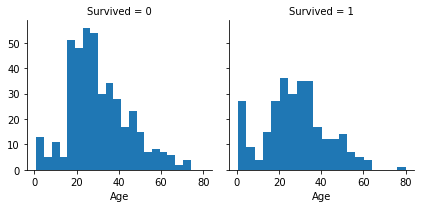

In [37]:
grid = sns.FacetGrid(train_df, col='Survived')
grid.map(plt.hist, 'Age', bins=20)

We had some assumptions about the correlation between age and survival, and **observations** based on the histogram confirmed these assumptions, such as..
- Infants(age <= 4) are more likely to survive
- Elders(age >= 80) are more likely to survive
- Many 15-25 year olds did not survive

Therefore we can make **decisions** to...
- (classifying assumption #1) Consider age in our model
- (completing assumption #1) Complete age feature
- (creating assumtion #3) Band age groups

#### Pclass & Age & Survival (Oridnal + Numerical + Categorical)
Pclass is an ordinal feature which had assumed has significant correlation with survival. We can again confirm this by visualizing the data into histograms. Also, since we believe that the distribution of Pclass varies wth age, we will plot age as the x-axis.

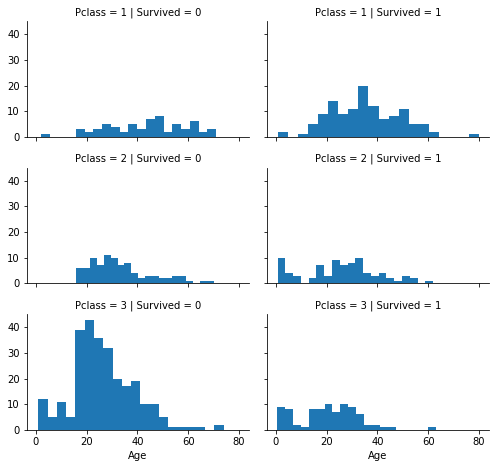

In [35]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', bins=20)

Our **observations**, as listed below, for Pclass could be confirmed by intrepreting the histogram
- (classifying assumption#2) Passengers with Pclass=3 were most less likely to survive
- (classifying assumption#2) Infant passengers with Pclass=2 or Pclass=3 were more likely to survive
- (classifying assumption#3) Most passengers with Pclass=1 were likely to survive

Therefore, we can make the **decision** to
- Take Pclass into model training

#### Sex & Embarked & Survival (Categorical)
For categorical features, we can visualize correlation with survival using a point plot.

C:\Users\13579\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\13579\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


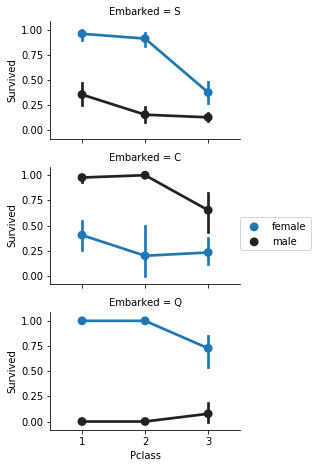

In [49]:
grid = sns.FacetGrid(train_df, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex')
grid.add_legend()

In this point plot, we try to find correlation between 4 categorical features. We can make some **observations** of this plot, such as...
- (classifying assumption#1) Passengers with Sex=female were more likely to survive than Sex=male, except in the Embarked=C category. This exception can be seen as a correlation between Pclass and Survived, not Embarked and Survived.
- Passengers with Sex=male and Pclass=3 were more likely to survive than those with Sex=male and Pclass=2 in Embarked=C or Q. 

Therefore, we can make such **decisions** accordingly...
- Include Sex feature in model training
- Complete Embarked feature before including in model training

#### Embarked & Sex & Fare & Survival (Categorical + Numerical)
We now can include the Fare feature into visualization to observe correlation. Since Fare is a numeric continuous feature, we will use a barplot to visualize it.

C:\Users\13579\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


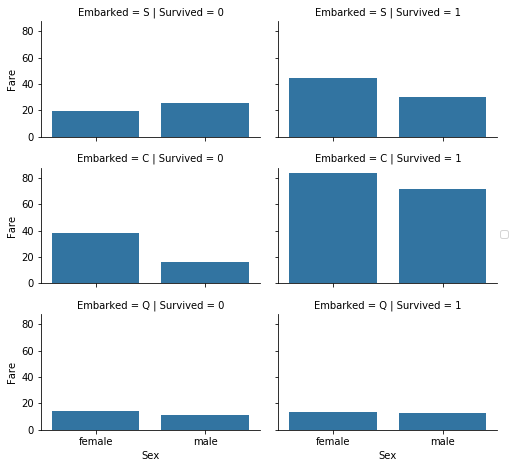

In [53]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', ci=None)
grid.add_legend()

Some **observations** made from this chart...
- Passengers with higher fares were more likely to survive
- Embarked shows correlation with survival

Therefore we can make **decisions** to...
- (creating assumption#4) Create fare ranges by banding the feature
- (completing assumption#2) Complete the Embarked feature